# Projeto 1

Aplicação de Classificadores para Sistemas de Detecção de Intrusão com Scikit-Learn e KDDCup dataset

- **Aluno**: Guilherme Rodriguez Vicentin
- **E-mail**: vicentingr@gmail.com

## 1 Ambiente de desenvolvimento

Antes de iniciar, iremos garantir que as dependências do projeto estão instaladas.

In [90]:
pip install scikit-learn pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2 Análise inicial dos dados

O KDDCup foi o conjunto de dados usado pela Terceira Competição Internacional de Ferramentas de Descoberta de Conhecimento e Mineração de Dados, que foi realizada em conjunto com a KDD-99, a Quinta Conferência Internacional sobre Descoberta de
Conhecimento e Mineração de Dados.

Tal conjunto possui um total de 42 características e 90747 registros. A característica **outcome** representa o ataque/anomalia a ser auditada, ou seja, define a classe de cada de cada registro.

In [3]:
import pandas as pd
df = pd.read_csv('KDDCup-balanceado.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,184,tcp,telnet,SF,1511,2957,0,0,0,3,...,3.0,1.00,0.00,1.00,0.67,0.0,0.0,0.0,0.0,buffer_overflow.
1,305,tcp,telnet,SF,1735,2766,0,0,0,3,...,4.0,1.00,0.00,0.50,0.50,0.0,0.0,0.0,0.0,buffer_overflow.
2,79,tcp,telnet,SF,281,1301,0,0,0,2,...,10.0,1.00,0.00,1.00,0.30,0.0,0.0,0.0,0.1,loadmodule.
3,25,tcp,telnet,SF,269,2333,0,0,0,0,...,2.0,0.03,0.06,0.01,0.00,0.0,0.0,0.0,0.0,perl.
4,23,tcp,telnet,SF,104,276,0,0,0,0,...,2.0,1.00,0.00,1.00,1.00,0.0,0.0,0.0,0.0,guess_passwd.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90747 entries, 0 to 90746
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     90747 non-null  int64  
 1   protocol_type                90744 non-null  object 
 2   service                      90740 non-null  object 
 3   flag                         90742 non-null  object 
 4   src_bytes                    90747 non-null  int64  
 5   dst_bytes                    90747 non-null  int64  
 6   land                         90747 non-null  int64  
 7   wrong_fragment               90747 non-null  int64  
 8   urgent                       90747 non-null  int64  
 9   hot                          90747 non-null  int64  
 10  num_failed_logins            90747 non-null  int64  
 11  logged_in                    90747 non-null  int64  
 12  num_compromised              90747 non-null  int64  
 13  root_shell      

### 2.1 Frequências

In [12]:
outcome_freq = df['outcome'].value_counts()
outcome_freq

outcome
satan.              15891
normal.             15000
neptune.            15000
smurf.              14999
ipsweep.            12481
portsweep.          10413
nmap.                2316
back.                2203
warezclient.         1020
teardrop.             979
pod.                  264
guess_passwd.          53
buffer_overflow.       30
land.                  21
warezmaster.           20
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: count, dtype: int64

<Axes: xlabel='outcome'>

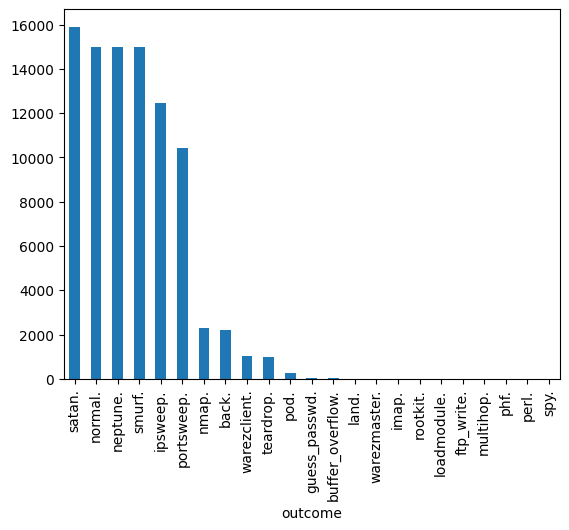

In [13]:
outcome_freq.plot(kind='bar')

### 2.2 Removendo dados nulos

Verificando a quantidade de dados nulos.

In [14]:
df.isnull().sum()

duration                       0
protocol_type                  3
service                        7
flag                           5
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              1
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Como são poucas entradas, iremos remover todas que possuem valores nulos.

In [4]:
df = df.dropna()
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## 3 Pré-processamento

### 3.1 Encoding

In [5]:
from sklearn import preprocessing

label_to_encode = ['protocol_type', 'service', 'flag', 'outcome']
label_encoders  = []

for label in label_to_encode:
    le = preprocessing.LabelEncoder()
    label_encoders.append(le)
    df[label] = le.fit_transform(df[label])


Após trocar as strings por valores númericos, podemos gerar o mapa de correlação entre as colunas do data frame.

<Axes: >

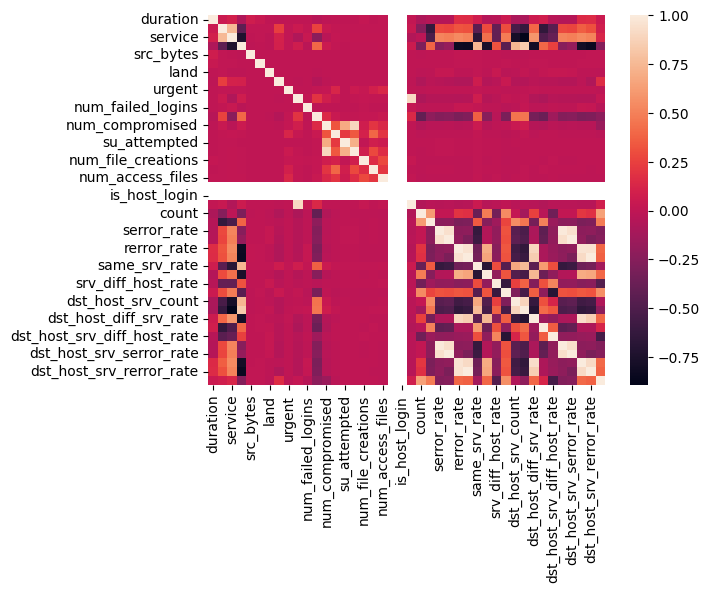

In [17]:
import seaborn as sns
sns.heatmap(df.corr())

### 3.2 Normalização

In [6]:
from sklearn import preprocessing

df_columns      = df.columns
norm            = preprocessing.Normalizer()
normalized_data = norm.transform(df.values)
df_norm         = pd.DataFrame(normalized_data, columns=df_columns)

df_norm.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0.055316,0.000301,0.017737,0.002706,0.454255,0.888970,0.0,0.0,0.0,0.000902,...,0.000902,0.000301,0.000000,0.000301,0.000201,0.0,0.0,0.0,0.000000,0.000301
1,0.092991,0.000305,0.017988,0.002744,0.528983,0.843324,0.0,0.0,0.0,0.000915,...,0.001220,0.000305,0.000000,0.000152,0.000152,0.0,0.0,0.0,0.000000,0.000305
2,0.059187,0.000749,0.044203,0.006743,0.210527,0.974717,0.0,0.0,0.0,0.001498,...,0.007492,0.000749,0.000000,0.000749,0.000225,0.0,0.0,0.0,0.000075,0.005244
3,0.010637,0.000425,0.025102,0.003829,0.114449,0.992599,0.0,0.0,0.0,0.000000,...,0.000851,0.000013,0.000026,0.000004,0.000000,0.0,0.0,0.0,0.000000,0.005106
4,0.076190,0.003313,0.195445,0.029814,0.344513,0.914283,0.0,0.0,0.0,0.000000,...,0.006625,0.003313,0.000000,0.003313,0.003313,0.0,0.0,0.0,0.000000,0.009938


## 4 Separação de dados de treino e teste

Split de 80% dos dados para treino e 20% para teste.

In [7]:
from sklearn.model_selection import train_test_split

Y = df['outcome'].values
X = df.values

x_training, x_test, y_training, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f'Quantidade de dados para treino X: {len(x_training)} e Y: {len(y_training)}')
print(f'Quantidade de dados para teste X: {len(x_test)} e Y: {len(y_test)}')

Quantidade de dados para treino X: 72580 e Y: 72580
Quantidade de dados para teste X: 18146 e Y: 18146


## 5 Treinamento

Para definir os valores de hiperparamêtros utilizaremos apenas os dados de treino e aplicaremos a técnica de cross-validation.

### 5.1 KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_accuracy_list = []
Ks = (1, 2, 3, 7, 11, 25, 51, 115)

for k in Ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_training, y_training, cv=5)
    knn_accuracy_list.append(scores.mean())

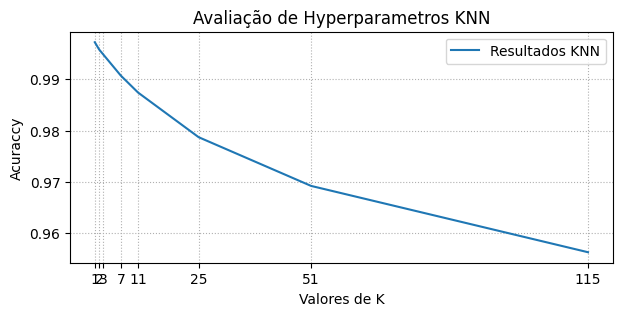

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(Ks, knn_accuracy_list, label='Resultados KNN')
ax.grid(True, linestyle=':')
ax.set(xlabel='Valores de K', ylabel='Acuraccy', title='Avaliação de Hyperparametros KNN', xticks=Ks);
plt.legend()
plt.show();

In [64]:
knn_accuracy_list

[0.9972306420501514,
 0.9958115183246073,
 0.9947919537062552,
 0.9907274731330945,
 0.987406999173326,
 0.9786993662165886,
 0.9691926150454669,
 0.956255166712593]

Para o KNN usaremos o número *n_neighbors* igual a 1, que obteve a melhor acurácia.

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_training, y_training)

KNeighborsClassifier(n_neighbors=1)

### 5.2 SVM

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='linear')
svm.fit(x_test, y_test)

SVC(kernel='linear')

Para o SVM usaremos o número *C* igual a 1.0. Cada execução do `smv.fit` leva mais de 2 horas rodando localmente (12 core; 8GB de ram; e placa de vídeo integrada). Por isto, eu tive dificuldades para realizar o treinamento utilizando esse modelo.

### 5.3 Árvore de Decisão

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree_accuracy_list = []
Ms = (1, 2, 3, 7, 11, 25, 51, 115)

for m in Ms:
    dt = DecisionTreeClassifier(max_depth=m)
    scores = cross_val_score(dt, x_training, y_training, cv=5)
    tree_accuracy_list.append(scores.mean())

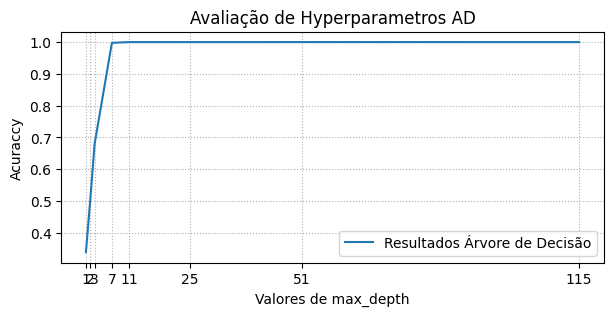

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(Ks, tree_accuracy_list, label='Resultados Árvore de Decisão')
ax.grid(True, linestyle=':')
ax.set(xlabel='Valores de max_depth', ylabel='Acuraccy', title='Avaliação de Hyperparametros AD', xticks=Ks);
plt.legend()
plt.show();

Para a árvore de decisão usaremos o número *max_depth* igual a 7, que obteve a melhor acurácia.

In [36]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_training, y_training)

DecisionTreeClassifier(max_depth=7)

## 6 Visualização dos resultados

### 6.1 KNN

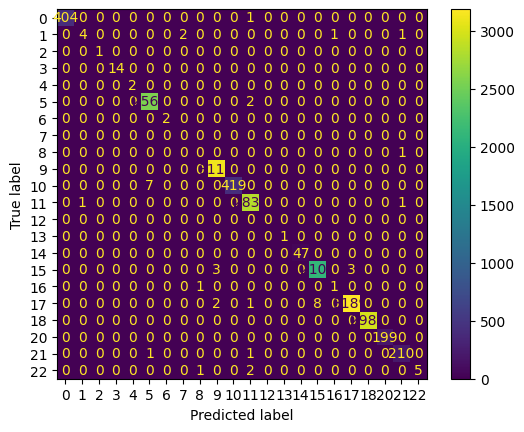

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn_predictions = knn.predict(x_test)
knn_cm = confusion_matrix(y_test, knn_predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
disp.plot()

Observando a matrix de confusão a cima podemos notar que ela foi capaz de prever com bastante acurária os resultados. A diagonal que parte do topo esquerdo e desce até o baixo direito, representa todas as predições corretas feita pelo modelo. Podemos ver alguns números diferentes de zero em outros lugares da matrix, o que significa que o modelo não foi capaz de prever corretamente o resultado nesses casos. Por exemplo, o modelo preveu erroneamente 8 vezes a label 15 enquanto na realidade deveria ser a label 17).

### 6.2 SVM

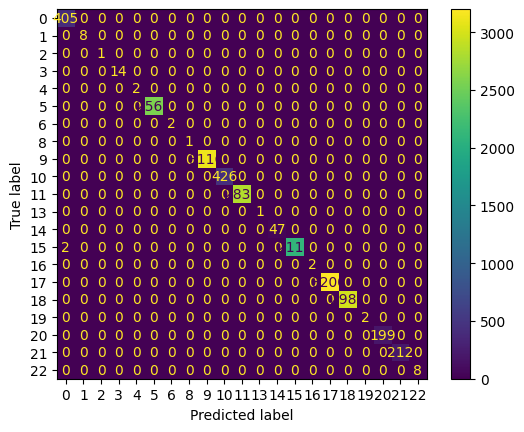

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
svm_predictions = svm.predict(x_test)
svm_cm = confusion_matrix(y_test, svm_predictions, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm.classes_)
disp.plot()

### 6.2 Árvore de decisão

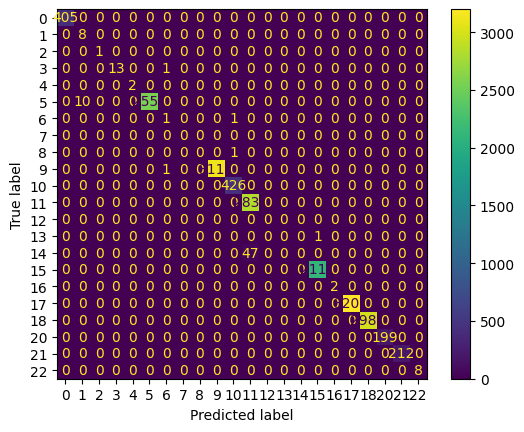

In [37]:
dt_predictions = dt.predict(x_test)
dt_cm = confusion_matrix(y_test, dt_predictions, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt.classes_)
disp.plot()

## 7 Comparação de desempenho

### 7.1 Acurácia

In [51]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, knn_predictions)
accuracy_svm = accuracy_score(y_test, svm_predictions)
accuracy_dt = accuracy_score(y_test, dt_predictions)
print(f"Accuracy KNN: {accuracy_knn}")
print(f"Accuracy SVM: {accuracy_svm}")
print(f"Accuracy DT: {accuracy_dt}")

Accuracy KNN: 0.9976854403174253
Accuracy SVM: 0.9998897828722584
Accuracy DT: 0.9964730519122672


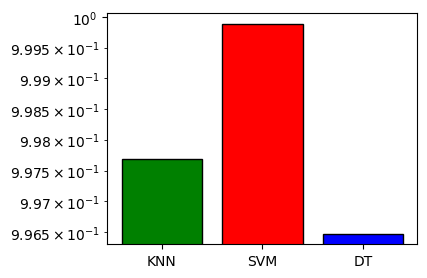

In [48]:
dict_accuracy = {'KNN' : accuracy_knn,
                 'SVM' : accuracy_svm,
                 'DT'  : accuracy_dt}

fig, ax = plt.subplots(figsize=(4, 3))

ax.bar(dict_accuracy.keys(), dict_accuracy.values(), color=['green', 'red', 'blue'], edgecolor='k')
ax.set_yscale('log')

### 7.2 Precisão

In [44]:
from sklearn.metrics import precision_score
precision_knn = precision_score(y_test, knn_predictions, average='micro')
precision_svm = precision_score(y_test, svm_predictions, average='micro')
precision_dt = precision_score(y_test, dt_predictions, average='micro')
print(f"Precission KNN: {precision_knn}")
print(f"Precission SVM: {precision_svm}")
print(f"Precission DT: {precision_dt}")

Precission KNN: 0.9976854403174253
Precission SVM: 0.9998897828722584
Precission DT: 0.9964730519122672


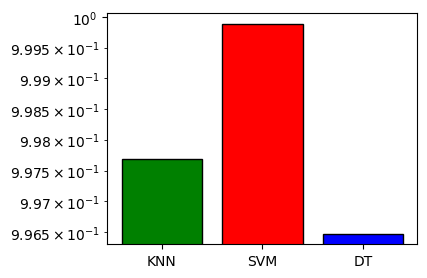

In [50]:
dict_accuracy = {'KNN' : precision_knn,
                 'SVM' : precision_svm,
                 'DT'  : precision_dt}

fig, ax = plt.subplots(figsize=(4, 3))

ax.bar(dict_accuracy.keys(), dict_accuracy.values(), color=['green', 'red', 'blue'], edgecolor='k')
ax.set_yscale('log')

### 7.3 Recall

In [53]:
from sklearn.metrics import recall_score
recall_knn = recall_score(y_test, knn_predictions, average='micro')
recall_svm = recall_score(y_test, svm_predictions, average='micro')
recall_dt = recall_score(y_test, dt_predictions, average='micro')
print(f"Recall KNN: {recall_knn}")
print(f"Recall SVM: {recall_svm}")
print(f"Recall SVM: {recall_dt}")

Recall KNN: 0.9976854403174253
Recall SVM: 0.9998897828722584
Recall SVM: 0.9964730519122672


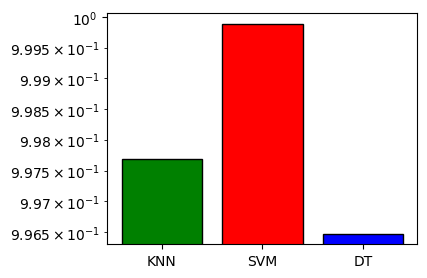

In [54]:
dict_accuracy = {'KNN' : recall_knn,
                 'SVM' : recall_svm,
                 'DT'  : recall_dt}

fig, ax = plt.subplots(figsize=(4, 3))

ax.bar(dict_accuracy.keys(), dict_accuracy.values(), color=['green', 'red', 'blue'], edgecolor='k')
ax.set_yscale('log')

### 7.4 Relatórios de classificação

In [29]:
from sklearn.metrics import classification_report
print("Relatório de classificação KNN: \n", classification_report(y_test, knn_predictions, zero_division=0))

Relatório de classificação KNN: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.80      0.50      0.62         8
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00      2568
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      3116
          10       1.00      0.98      0.99       426
          11       1.00      1.00      1.00      2835
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        47
          15       1.00      1.00      1.00      2113
          16       0.50      0.50      0.50         2
          17       1.00      1.00      1.00    

In [31]:
print("Relatório de classificação SVM: \n", classification_report(y_test, svm_predictions, zero_division=0))

Relatório de classificação SVM: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00      2568
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00      3116
          10       1.00      1.00      1.00       426
          11       1.00      1.00      1.00      2835
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        47
          15       1.00      1.00      1.00      2113
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00      3200
          18       1.00      1.00      1.00    

In [52]:
print("Relatório de classificação Árvore de decisão: \n", classification_report(y_test, dt_predictions, zero_division=0))

Relatório de classificação Árvore de decisão: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.44      1.00      0.62         8
           2       1.00      1.00      1.00         1
           3       1.00      0.93      0.96        14
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00      2568
           6       0.33      0.50      0.40         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      3116
          10       1.00      1.00      1.00       426
          11       0.98      1.00      0.99      2835
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        47
          15       1.00      1.00      1.00      2113
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00      3200
          18       1.00      1.00